<h1 style="font-family: 'Comic Sans MS'; color: 
rgba(185, 51, 113, 1);">
BE
</h1>

In [1]:
import pandas as pd

def read_ds(ds_name: str):
    """
    Charge un fichier CSV de traces utilisateur (train ou test)
    et le convertit en DataFrame Pandas, en gérant les longueurs de lignes variables.
    """

    # Fichier à ouvrir (en minuscules)
    file_path = f"{ds_name.lower()}.csv"

    # Lecture manuelle du fichier (plus robuste que read_csv)
    with open(file_path, "r", encoding="utf-8") as f:
        lignes = f.readlines()

    data = []

    for ligne in lignes:
        ligne = ligne.strip()
        champs = ligne.split(",")  # délimiteur = virgule
        data.append(champs)

    if ds_name.lower() == "train":
        # TRAIN → contient l'utilisateur en 1re colonne
        df = pd.DataFrame(data)
        df.rename(columns={0: "util", 1: "navigateur"}, inplace=True)
        df["trace"] = df.iloc[:, 2:].apply(lambda x: ",".join(x.dropna().astype(str)), axis=1)
        df = df[["util", "navigateur", "trace"]]

    else:
        # TEST → ne contient pas la colonne utilisateur
        df = pd.DataFrame(data)
        df.rename(columns={0: "navigateur"}, inplace=True)
        df["trace"] = df.iloc[:, 1:].apply(lambda x: ",".join(x.dropna().astype(str)), axis=1)
        df = df[["navigateur", "trace"]]

    return df

if __name__ == "__main__":
    features_train = read_ds("train")
    features_test = read_ds("test")

    # Quelques vérifications
    print(features_train.shape, features_test.shape)
    print(features_train.head())

(3279, 3) (324, 2)
  util      navigateur                                              trace
0  nuh         Firefox  Création d'un écran(infologic.core.accueil.Acc...
1  muz   Google Chrome  Création d'un écran(infologic.core.gui.control...
2  zrx  Microsoft Edge  Affichage d'une dialogue(infologic.core.gui.co...
3  pou         Firefox  Création d'un écran(infologic.core.gui.control...
4  ald   Google Chrome  Affichage d'une dialogue(infologic.acti.module...


🔍 APERÇU DU DATASET : TRAIN
  util      navigateur                                              trace
0  nuh         Firefox  Création d'un écran(infologic.core.accueil.Acc...
1  muz   Google Chrome  Création d'un écran(infologic.core.gui.control...
2  zrx  Microsoft Edge  Affichage d'une dialogue(infologic.core.gui.co...
3  pou         Firefox  Création d'un écran(infologic.core.gui.control...
4  ald   Google Chrome  Affichage d'une dialogue(infologic.acti.module... 

📏 Dimensions : (3279, 3)
🧱 Colonnes : ['util', 'navigateur', 'trace']

Valeurs manquantes :
util          0
navigateur    0
trace         0
dtype: int64 

📊 Statistiques sur la longueur des traces :
count     3279.000000
mean       850.238792
std       1212.323701
min          2.000000
25%        192.000000
50%        423.000000
75%       1019.000000
max      14468.000000
Name: longueur_trace, dtype: float64 



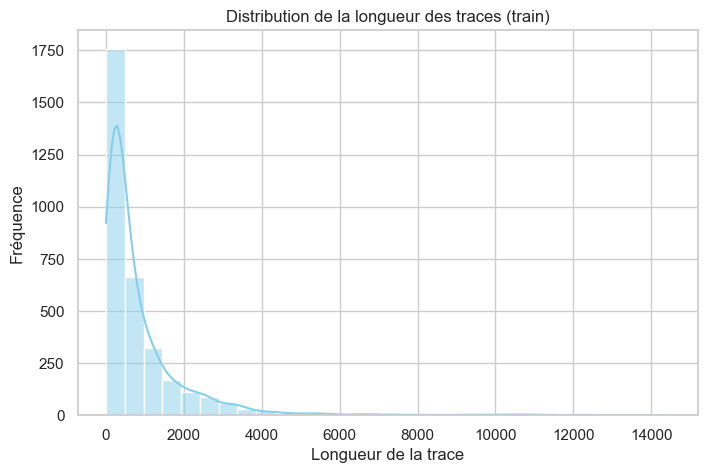

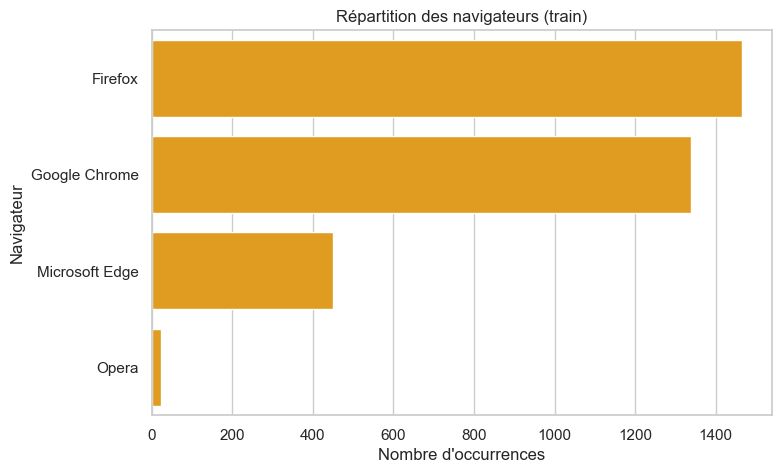

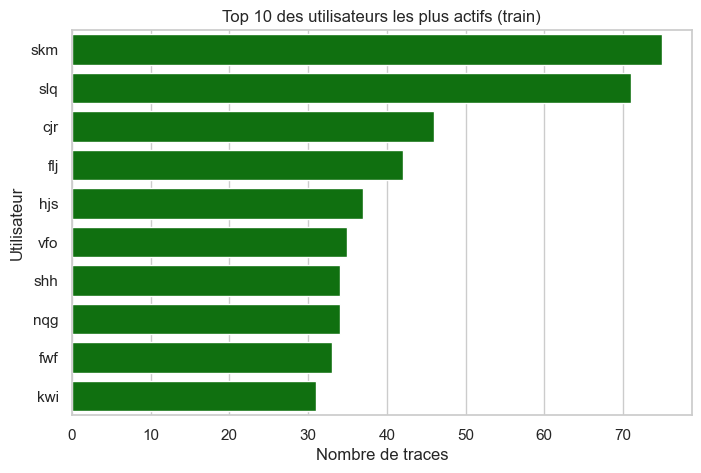

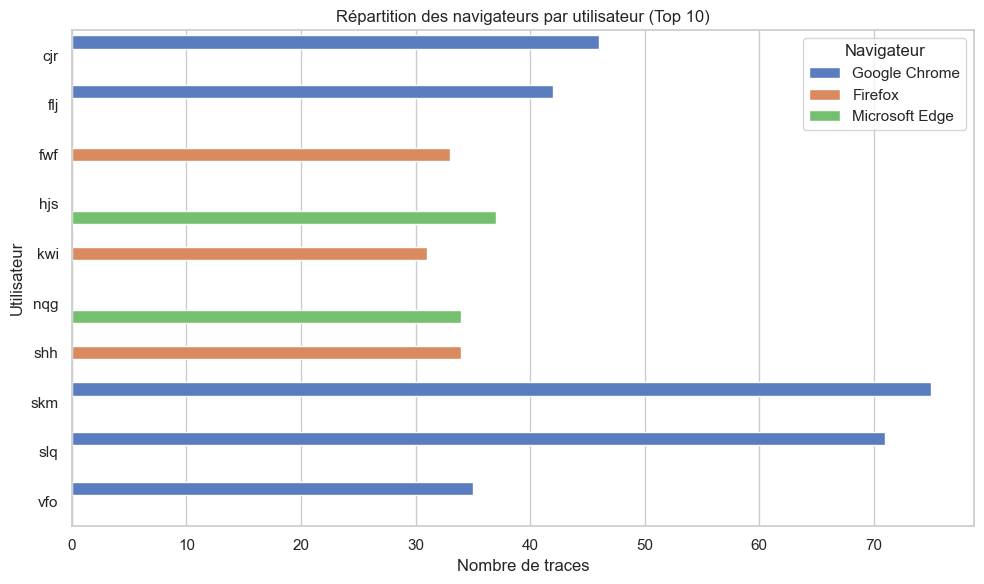

In [3]:
# ========================================
# EXPLORATION INTELLIGENTE DU DATASET
# ========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Amélioration du style graphique
sns.set(style="whitegrid", palette="muted")

def read_ds(ds_name: str):
    """
    Charge un fichier CSV de traces utilisateur (train ou test)
    et le convertit en DataFrame Pandas, en gérant les longueurs de lignes variables.
    """

    file_path = f"{ds_name.lower()}.csv"
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Le fichier {file_path} est introuvable.")

    with open(file_path, "r", encoding="utf-8") as f:
        lignes = f.readlines()

    data = []
    for ligne in lignes:
        ligne = ligne.strip()
        if not ligne:
            continue
        champs = ligne.split(",")
        data.append(champs)

    if ds_name.lower() == "train":
        df = pd.DataFrame(data)
        df.rename(columns={0: "util", 1: "navigateur"}, inplace=True)
        df["trace"] = df.iloc[:, 2:].apply(lambda x: ",".join(x.dropna().astype(str)), axis=1)
        df = df[["util", "navigateur", "trace"]]
    else:
        df = pd.DataFrame(data)
        df.rename(columns={0: "navigateur"}, inplace=True)
        df["trace"] = df.iloc[:, 1:].apply(lambda x: ",".join(x.dropna().astype(str)), axis=1)
        df = df[["navigateur", "trace"]]

    return df


def explorer_dataset(df: pd.DataFrame, ds_name: str):
    """
    Analyse descriptive et visualisation du dataset.
    """
    print("="*60)
    print(f"🔍 APERÇU DU DATASET : {ds_name.upper()}")
    print("="*60)
    print(df.head(), "\n")

    print("📏 Dimensions :", df.shape)
    print("🧱 Colonnes :", list(df.columns))
    print("\nValeurs manquantes :")
    print(df.isnull().sum(), "\n")

    # Si la colonne 'trace' existe → statistiques sur la longueur
    if "trace" in df.columns:
        df["longueur_trace"] = df["trace"].apply(lambda x: len(str(x).split(",")))

        print("📊 Statistiques sur la longueur des traces :")
        print(df["longueur_trace"].describe(), "\n")

        # Graphique 1 : distribution des longueurs de trace
        plt.figure(figsize=(8,5))
        sns.histplot(df["longueur_trace"], bins=30, kde=True, color="skyblue")
        plt.title(f"Distribution de la longueur des traces ({ds_name})")
        plt.xlabel("Longueur de la trace")
        plt.ylabel("Fréquence")
        plt.show()

    # Si la colonne navigateur existe → fréquence
    if "navigateur" in df.columns:
        plt.figure(figsize=(8,5))
        sns.countplot(y=df["navigateur"], order=df["navigateur"].value_counts().index, color="orange")
        plt.title(f"Répartition des navigateurs ({ds_name})")
        plt.xlabel("Nombre d'occurrences")
        plt.ylabel("Navigateur")
        plt.show()

    # Si la colonne util existe → activité des utilisateurs
    if "util" in df.columns:
        top_users = df["util"].value_counts().head(10)
        plt.figure(figsize=(8,5))
        sns.barplot(x=top_users.values, y=top_users.index, color="green")
        plt.title(f"Top 10 des utilisateurs les plus actifs ({ds_name})")
        plt.xlabel("Nombre de traces")
        plt.ylabel("Utilisateur")
        plt.show()

        # ======================================================
    # 📊 NOUVELLE PARTIE : Répartition des navigateurs par utilisateur
    # ======================================================
    if "util" in df.columns and "navigateur" in df.columns:
        # Comptage des paires (utilisateur, navigateur)
        pivot = df.groupby(["util", "navigateur"]).size().reset_index(name="nb_traces")

        # On peut afficher les 20 utilisateurs les plus actifs
        top_users = df["util"].value_counts().head(10).index
        pivot_top = pivot[pivot["util"].isin(top_users)]

        plt.figure(figsize=(10, 6))
        sns.barplot(
            data=pivot_top,
            x="nb_traces",
            y="util",
            hue="navigateur",
            dodge=True
        )
        plt.title("Répartition des navigateurs par utilisateur (Top 10)")
        plt.xlabel("Nombre de traces")
        plt.ylabel("Utilisateur")
        plt.legend(title="Navigateur")
        plt.tight_layout()
        plt.show()



if __name__ == "__main__":
    # Lecture
    features_train = read_ds("train")

    # Exploration intelligente
    explorer_dataset(features_train, "train")
